# JSON exercise
Using data in file 'data/world_bank_projects.json'

1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [2]:
import json
from pandas.io.json import json_normalize as jn
import pandas as pd

In [3]:
df = pd.read_json('data/world_bank_projects.json') # Load file into dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

## 1. Find the 10 countries with most projects

In [4]:
country_projects = df[['countryname','project_name']] 
country_counts=country_projects.groupby('countryname').count().sort_values('project_name',ascending=False)
country_counts.head(10)

,project_name
countryname,
People's Republic of China,19
Republic of Indonesia,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Nepal,12
Kingdom of Morocco,12
Republic of Mozambique,11


Text(0, 0.5, 'project numer')

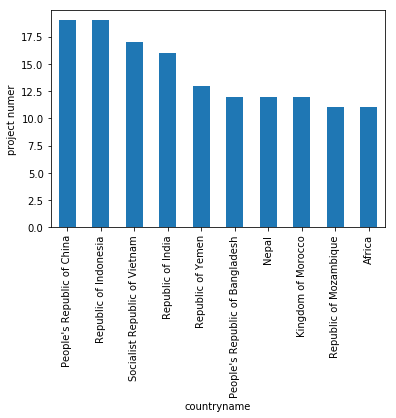

In [21]:
#Data visualization of question-1
import matplotlib.pyplot as plt
%matplotlib inline
#plot the first 10 countries with most projects
#x is countryname
#y is number of projects
ax=country_counts.head(10).plot(kind='bar',legend=None)
ax.set_ylabel('project numer')

## 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [17]:
data = json.load((open('data/world_bank_projects.json'))) # Load file to dictionary
themes = jn(data,'mjtheme_namecode') # json_normalization
topthemes = themes.groupby('name').count().sort_values('code',ascending=False).head(10)
topthemes

,code
name,
Environment and natural resources management,223
Rural development,202
Human development,197
Public sector governance,184
Social protection and risk management,158
Financial and private sector development,130
,122
Social dev/gender/inclusion,119
Trade and integration,72


Text(0, 0.5, 'project theme number')

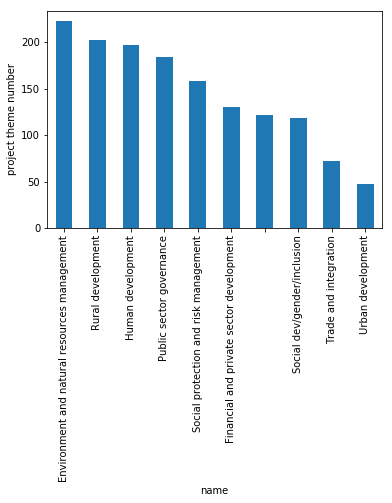

In [22]:
#visualize question-2
#x is project name
#y is top 10 major projects themes
ax = topthemes.plot(kind='bar',legend=None)
ax.set_ylabel('project theme number')

## 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [15]:
#old dataframe contain empty names
themes.head(10)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [16]:
#create a new dataframe which have the names filled according to code number, called themes_fill
themes_fill=pd.DataFrame()
themes_fill['code'] = themes.code
themes_fill['name'] = themes.sort_values('code').name.replace('', method='bfill')
themes_fill.columns = ['code','name']
themes_fill.head(10)

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [17]:
#After filled, the new dataframe give more accurate counting results as in 2.
themes_fill.groupby('name').count().sort_values('code',ascending=False).head(10)

,code
name,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50
